In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [4]:
import cupy as cp

In [71]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/LV/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [72]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [73]:
flux0.shape, wave0.shape

((116614, 15404), (15404,))

In [74]:
wave0[1:][100] / np.diff(wave0)[100]

10002.376897678601

In [75]:
from lv.base.dataloader_c import DataLoader

In [76]:
ds = DataLoader()

In [77]:
ds.prepare_data (flux0, wave0, para0, "BlueHB", "BHB", fix_CO=0)

Cupy flux: 3300, wave: 2696


# find masking 

In [78]:
u,w,v = ds._svd(ds.flux)

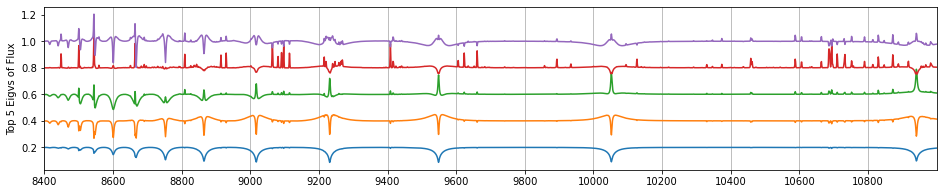

In [81]:
ds.plot_eigv(cp.asnumpy(v), name="Flux", step=0.2)

In [90]:
k,q,prom = 3, 0.65, 0.003
nvv= ds.get_peaks(k=k,q=q,prom=prom, out=1)

Text(0.5, 1.0, 'k=3, q=0.65, prom=0.003')

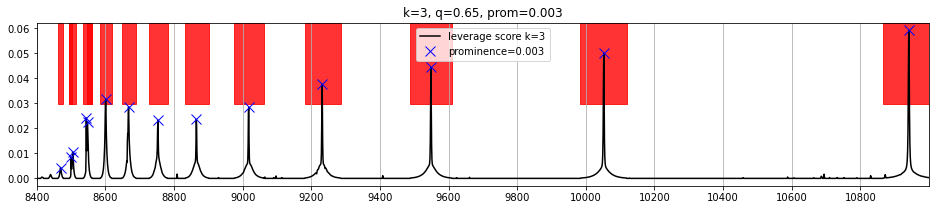

In [91]:
ds.plot_peaks(nvv, k, prom)
plt.title(f"k={k}, q={q}, prom={prom}")

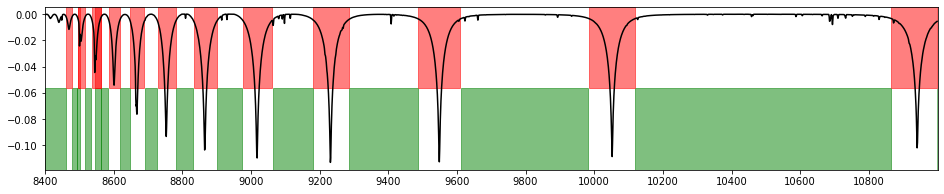

In [92]:
ds.plot_MN_mask(v[:1])

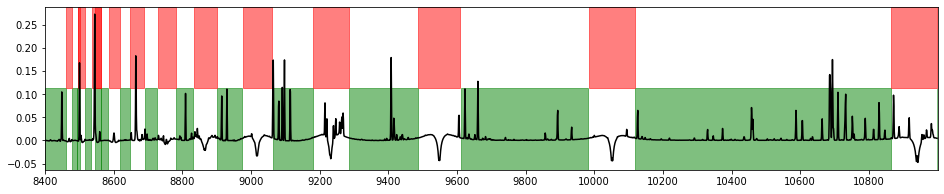

In [93]:
ds.plot_MN_mask(v[3:4])

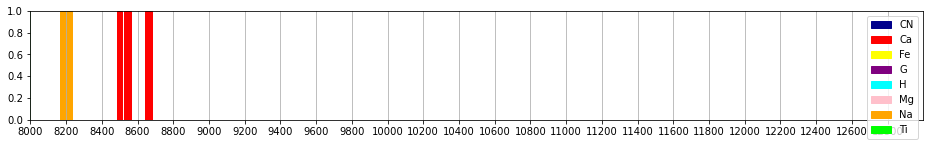

In [75]:
ds.plot_lick()

In [94]:
ds.get_MN(ds.mask, top=5)

(0.0, 1.2516539730131626)

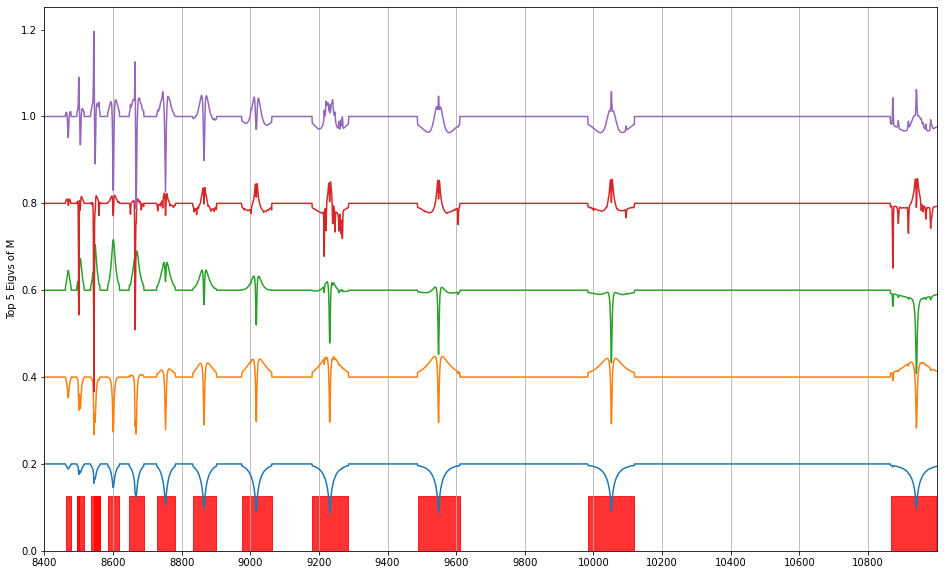

In [101]:
step = 0.2
axs = plt.subplots(1,figsize=(16,10))[1]
ds.plot_eigv(ds.Mv, mask=None, name="M", step=step, ax=axs)
ds.plot_masked(ax=axs, ymin=0, ymax=0.1)
axs.set_ylim(0.0, None)

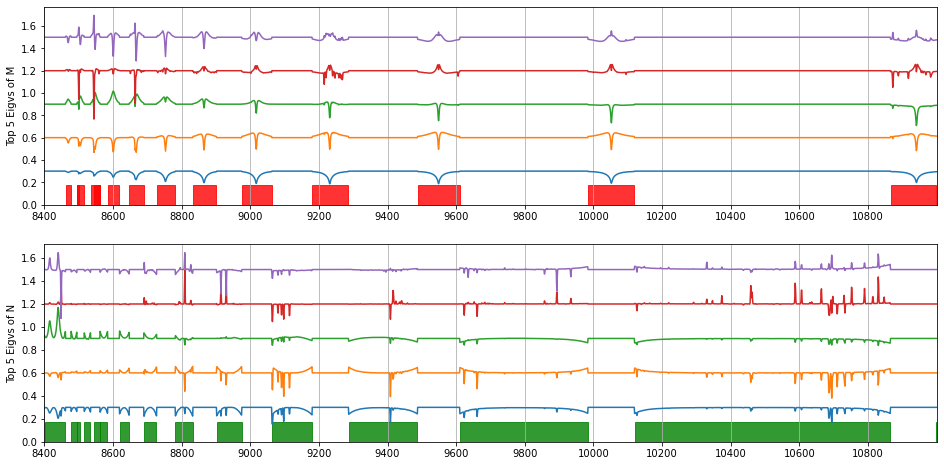

In [95]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_MN(step=0.3, axs=axs)

In [102]:
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

7.383258 0.017407765595569783 64969.86


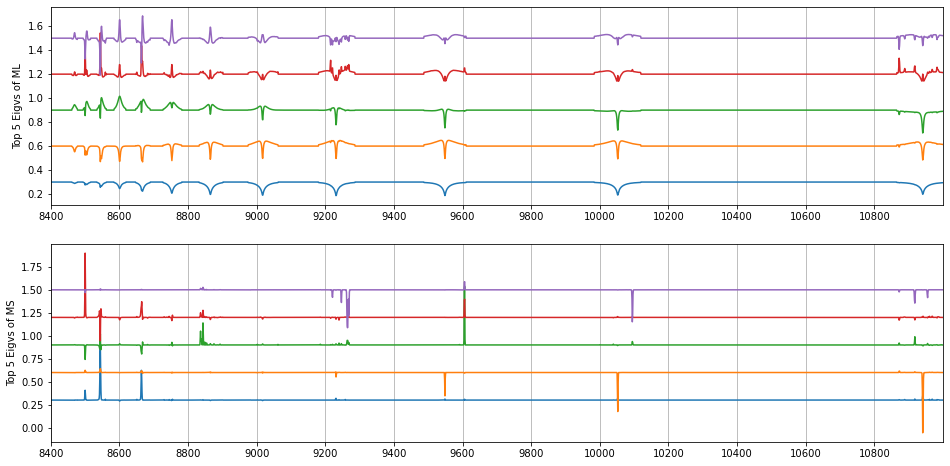

In [103]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(MLv, name="ML", ax=axs[0])
ds.plot_eigv(MSv, name="MS", ax=axs[1])

In [ ]:
plt.plot(ds.nwave, cp.asnumpy(MSv[0]))
plt.xlim(6565,6570)

In [121]:
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=None, lam=None, norm=None, maxiter=100)

95.64038 0.017407765595569783 298.01178


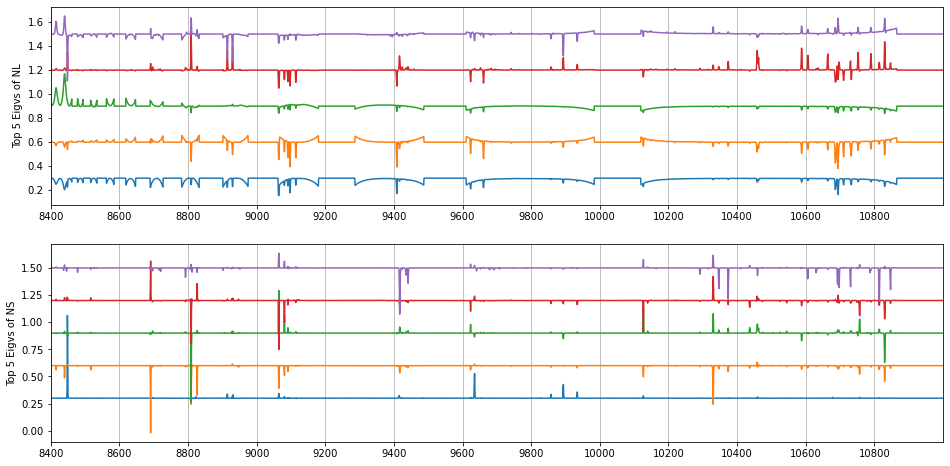

In [122]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(NLv, name="NL", ax=axs[0])
ds.plot_eigv(NSv, name="NS", ax=axs[1])

In [123]:
ds.pcp_transform(MLv, MSv, NLv, NSv)

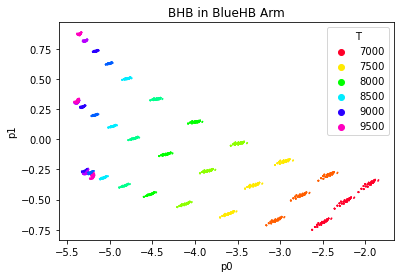

In [114]:
ds.p(0,1,"T",large=0)

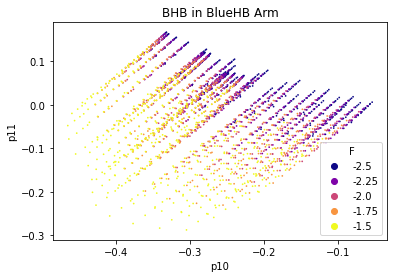

In [113]:
ds.p(10,11,"F")

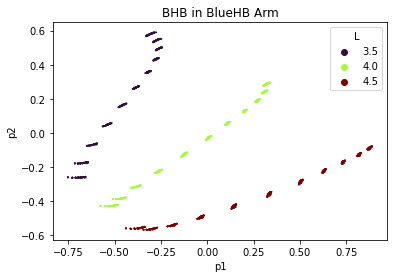

In [115]:
ds.p(1,2,"L")

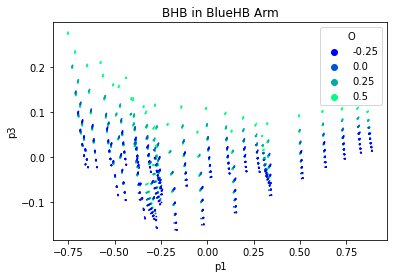

In [110]:
ds.p(1,3,"O")

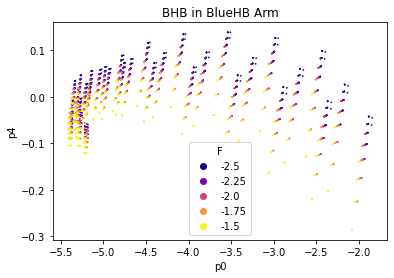

In [111]:
ds.p(0,4,"F")

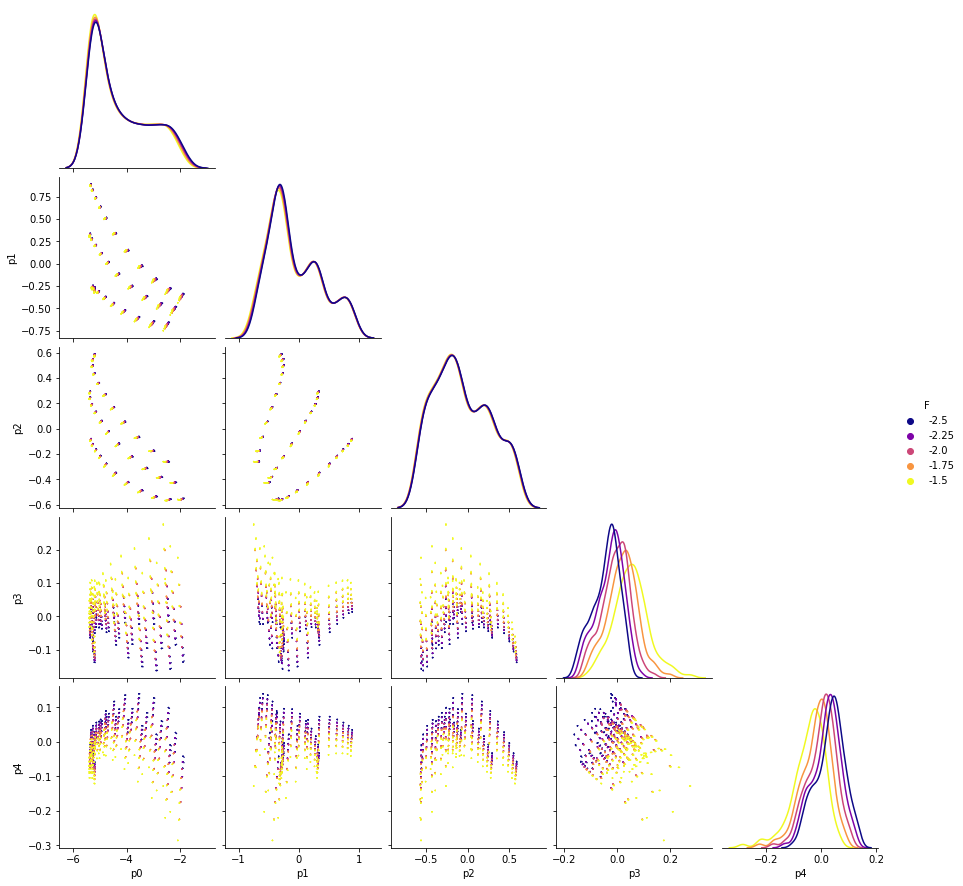

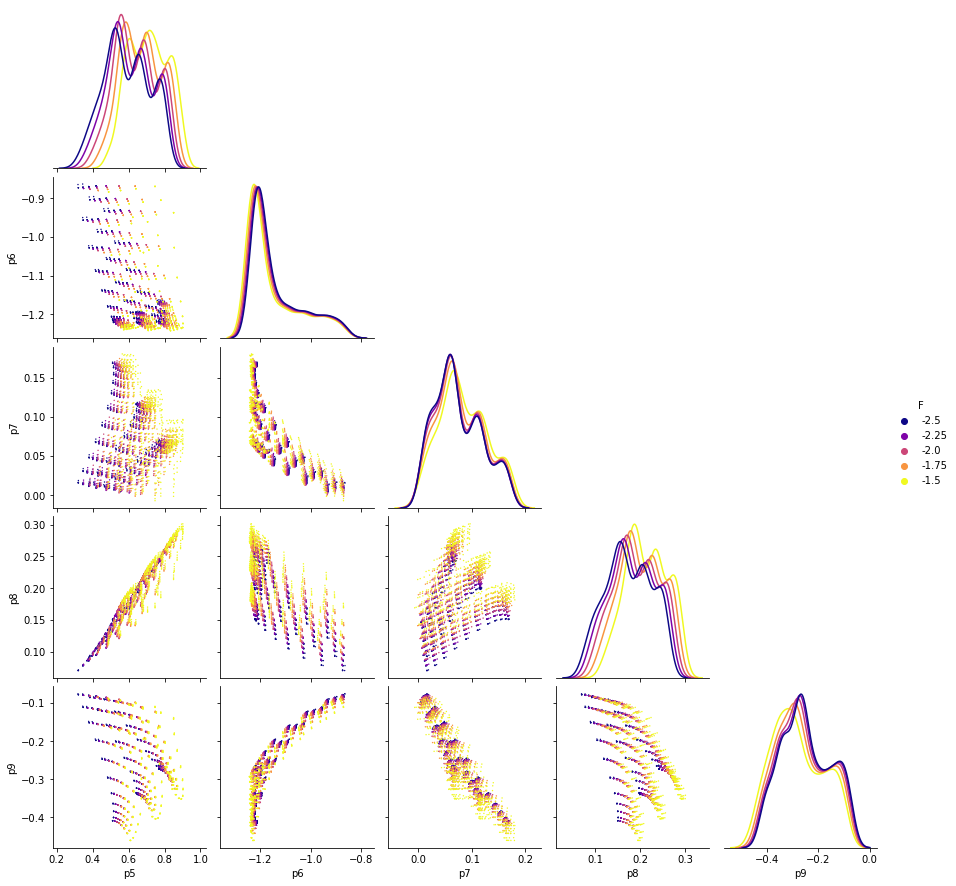

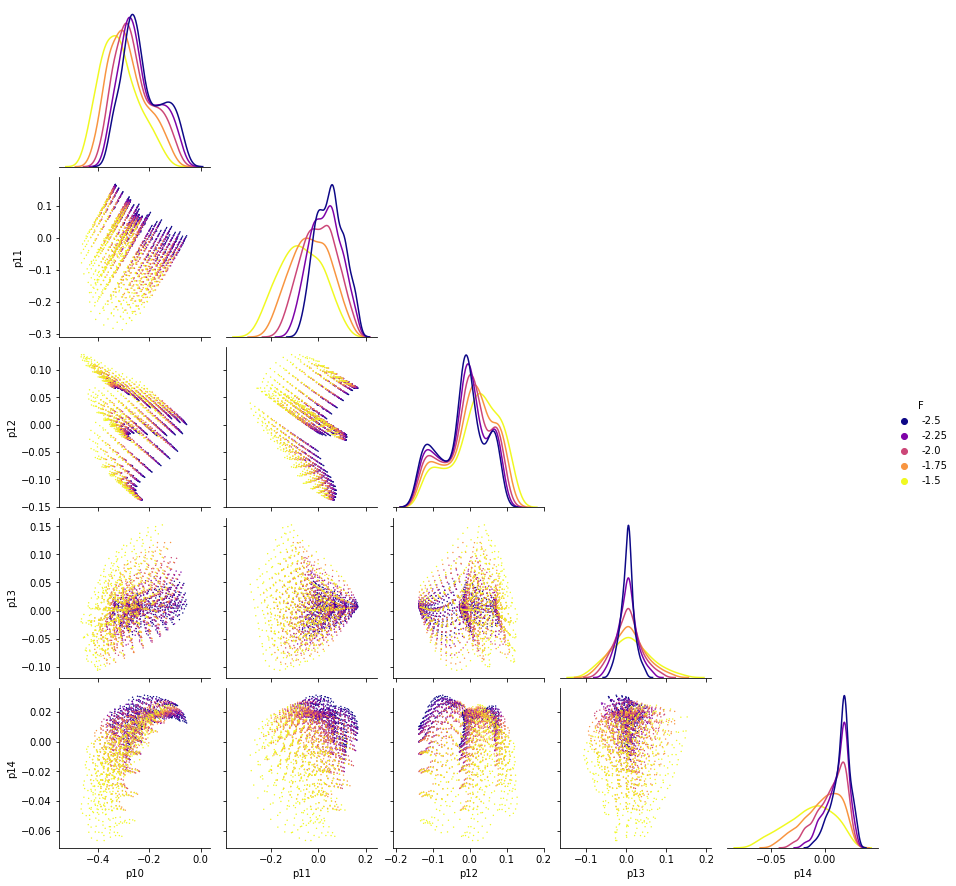

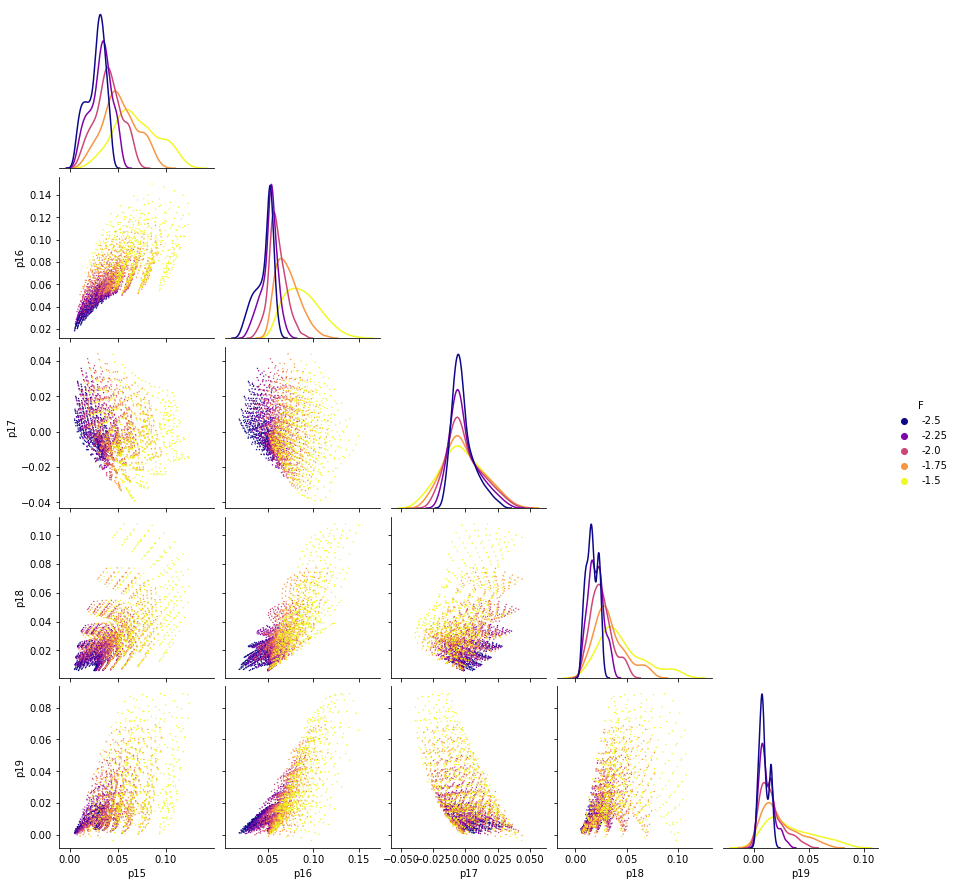

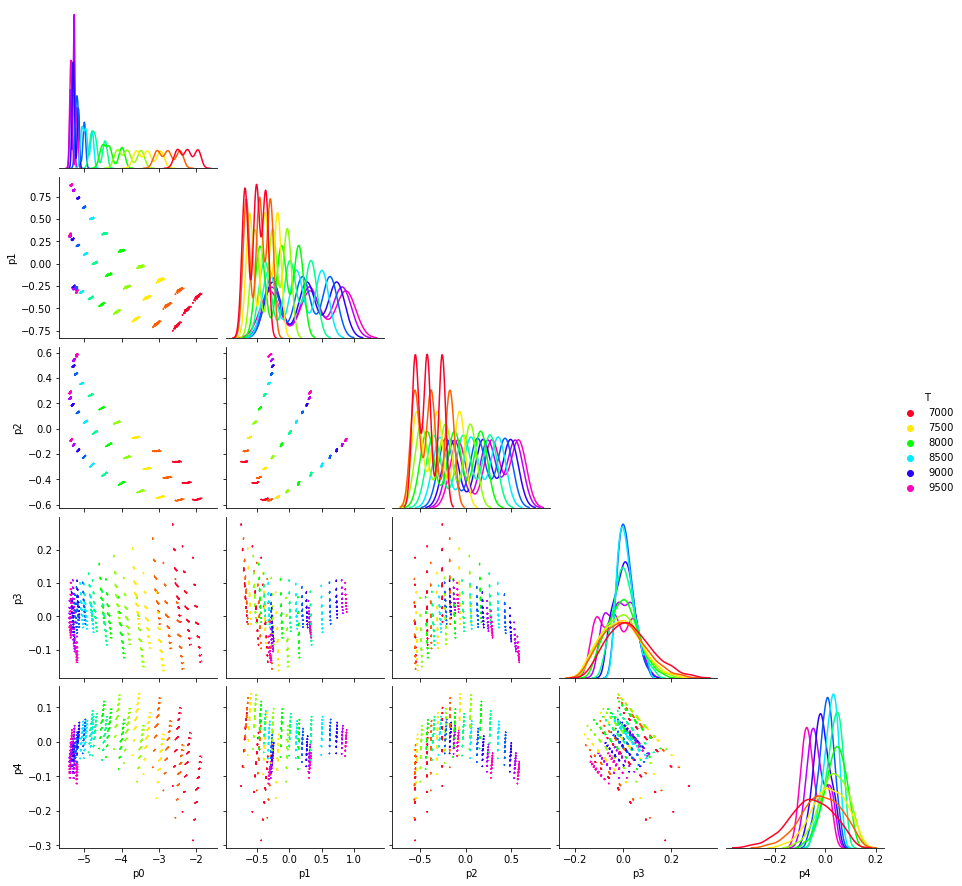

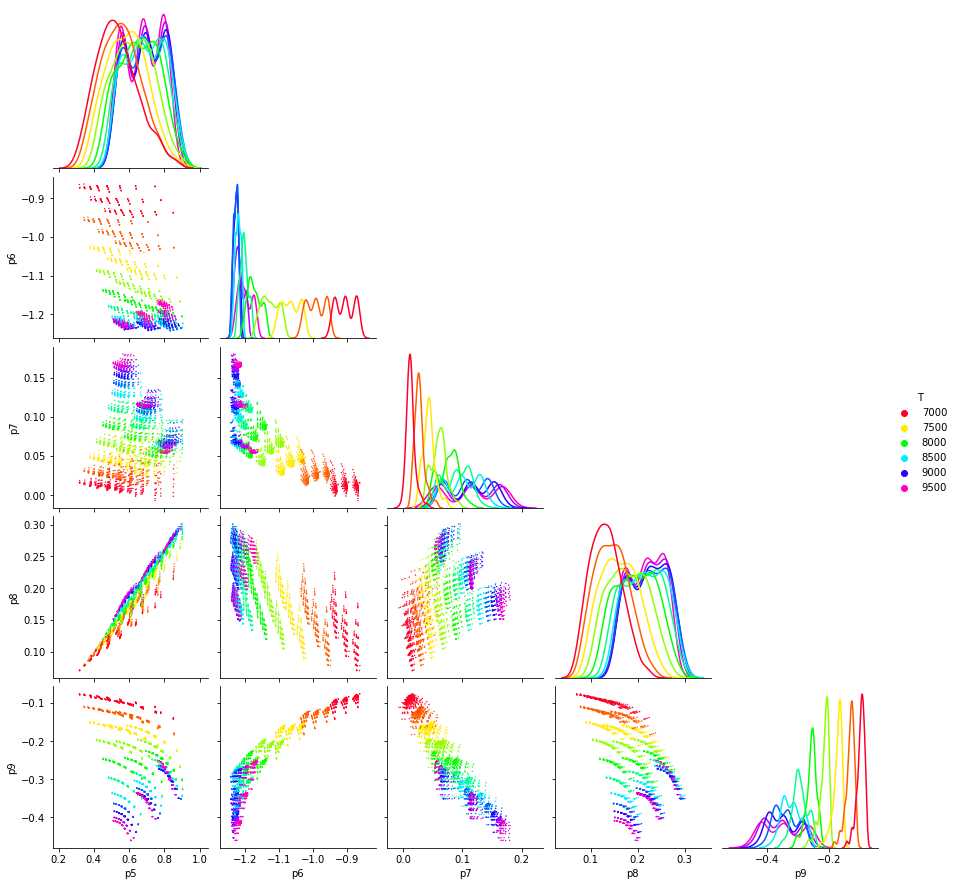

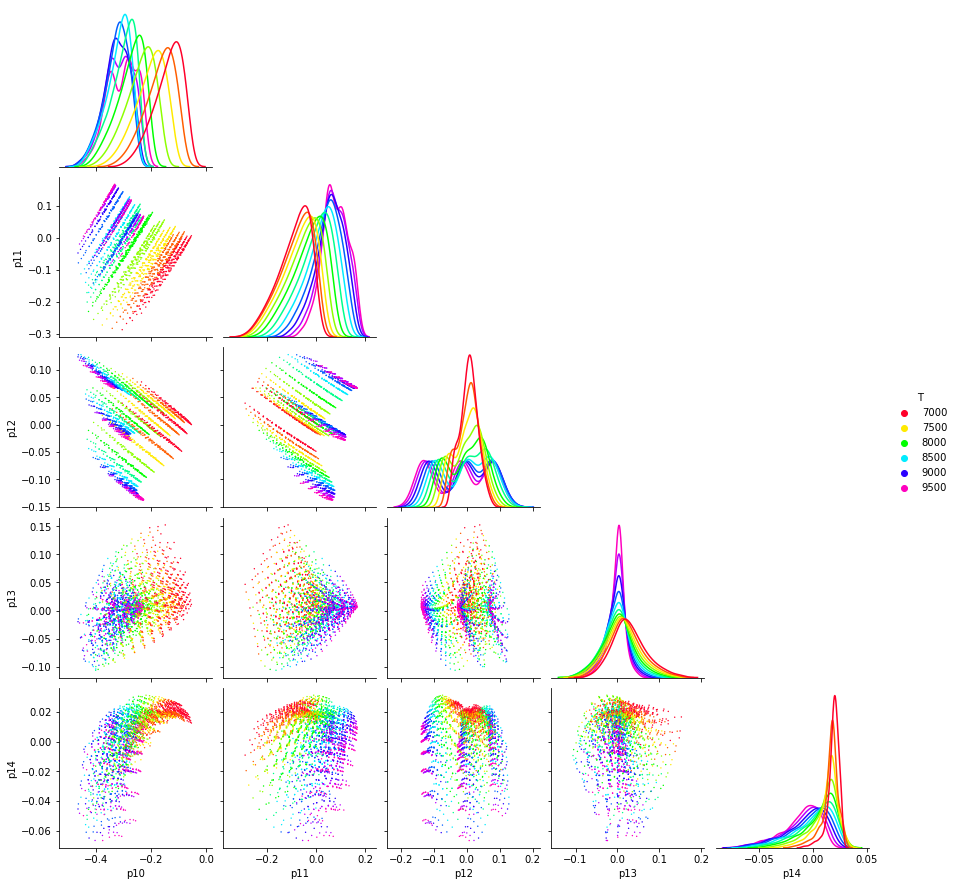

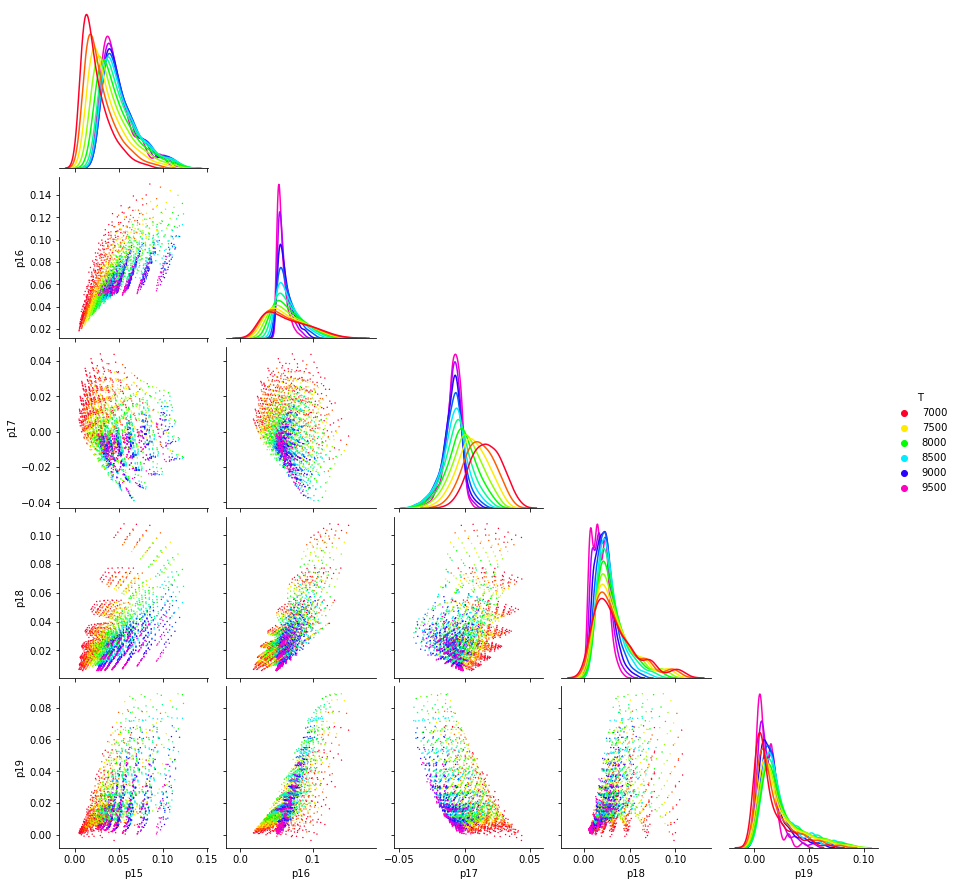

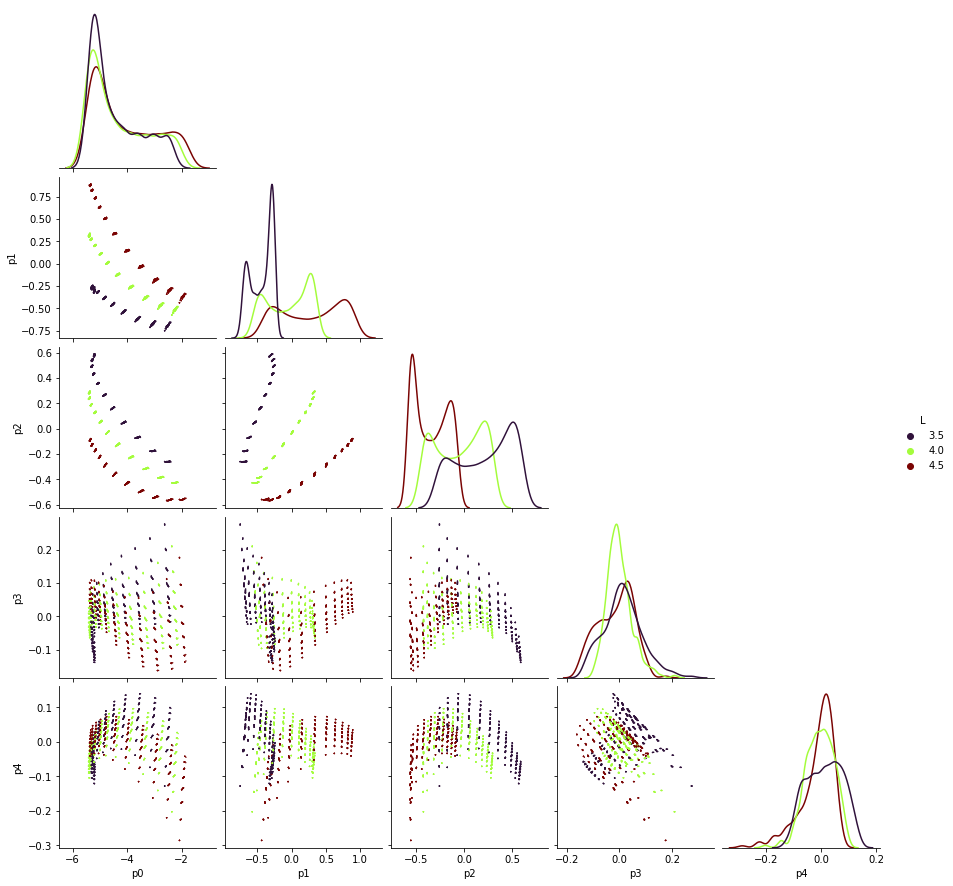

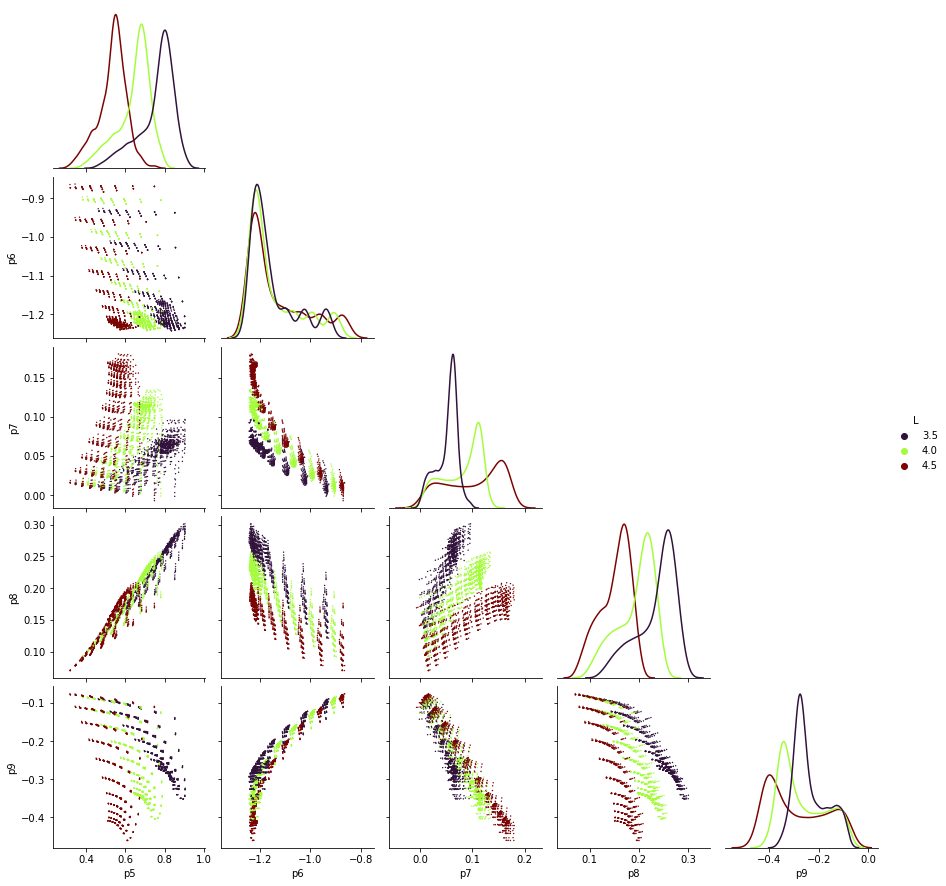

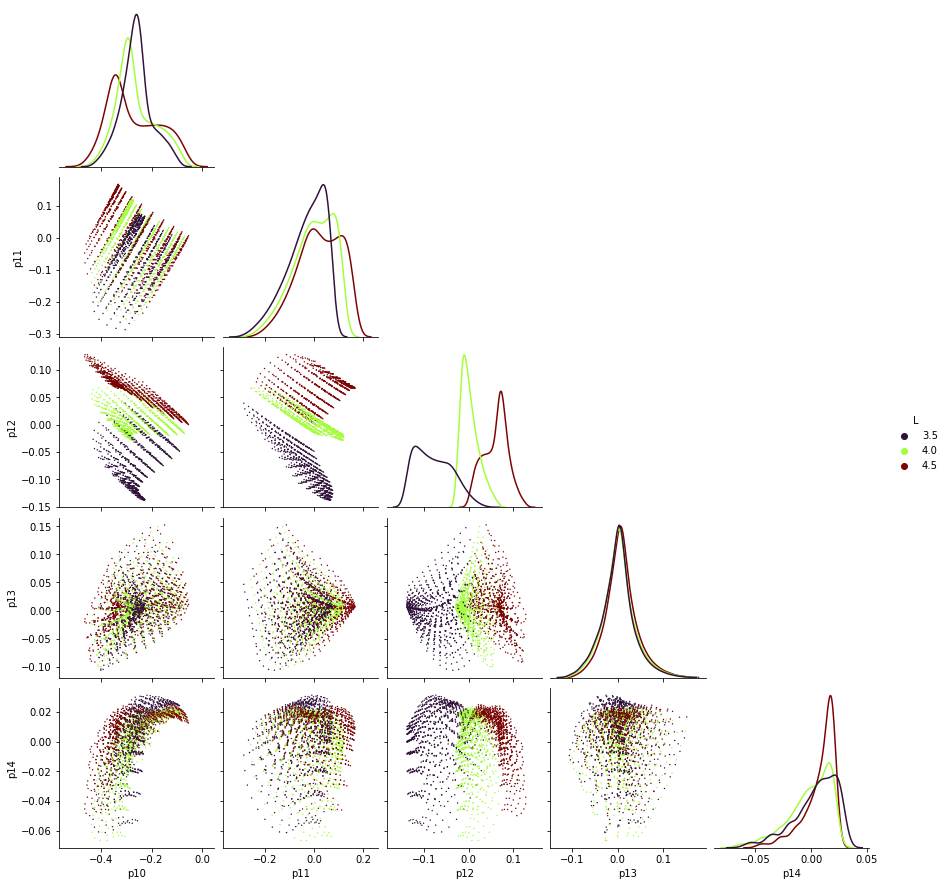

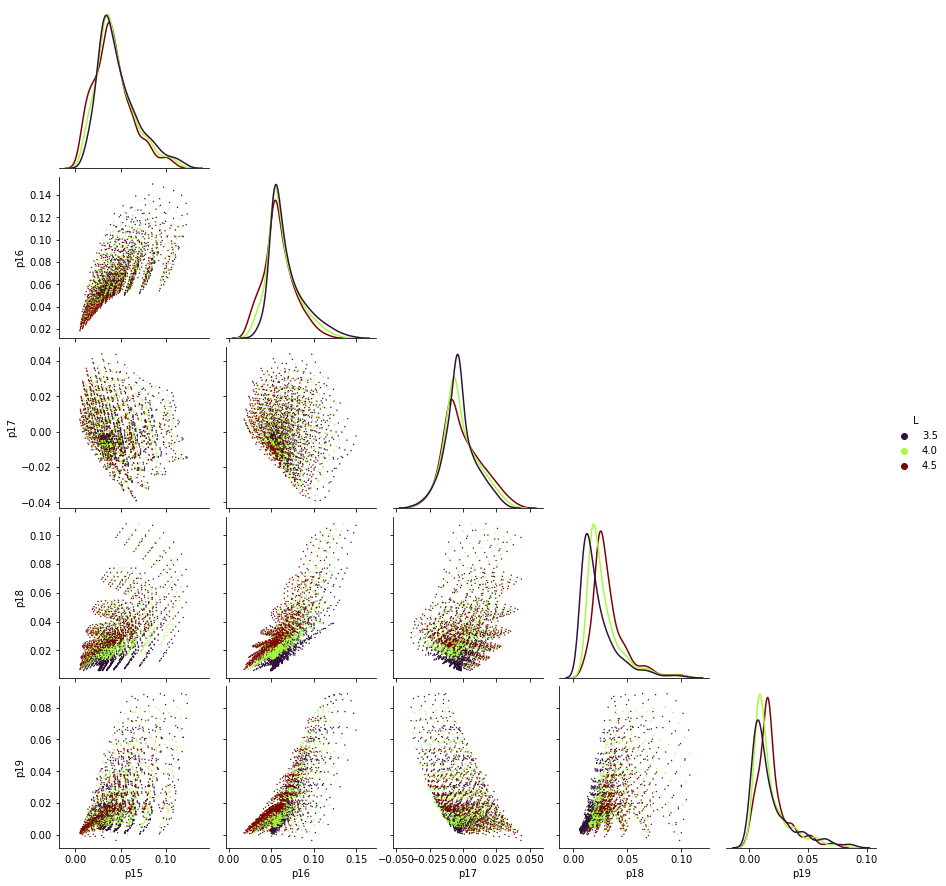

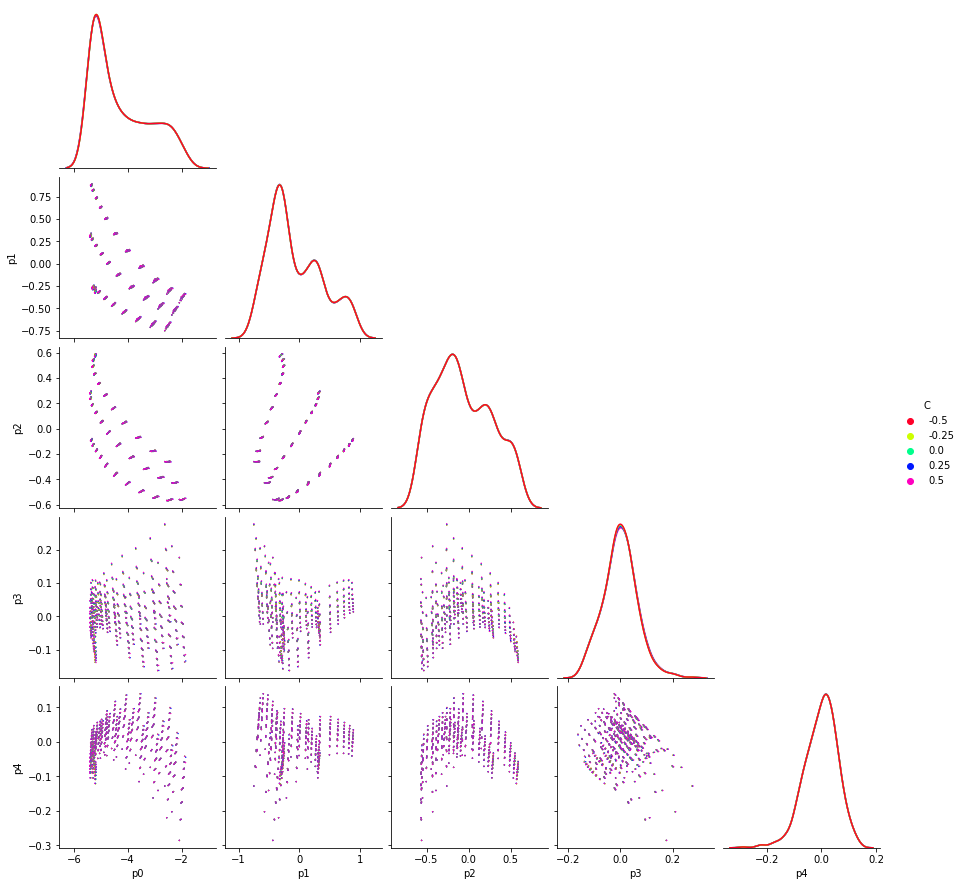

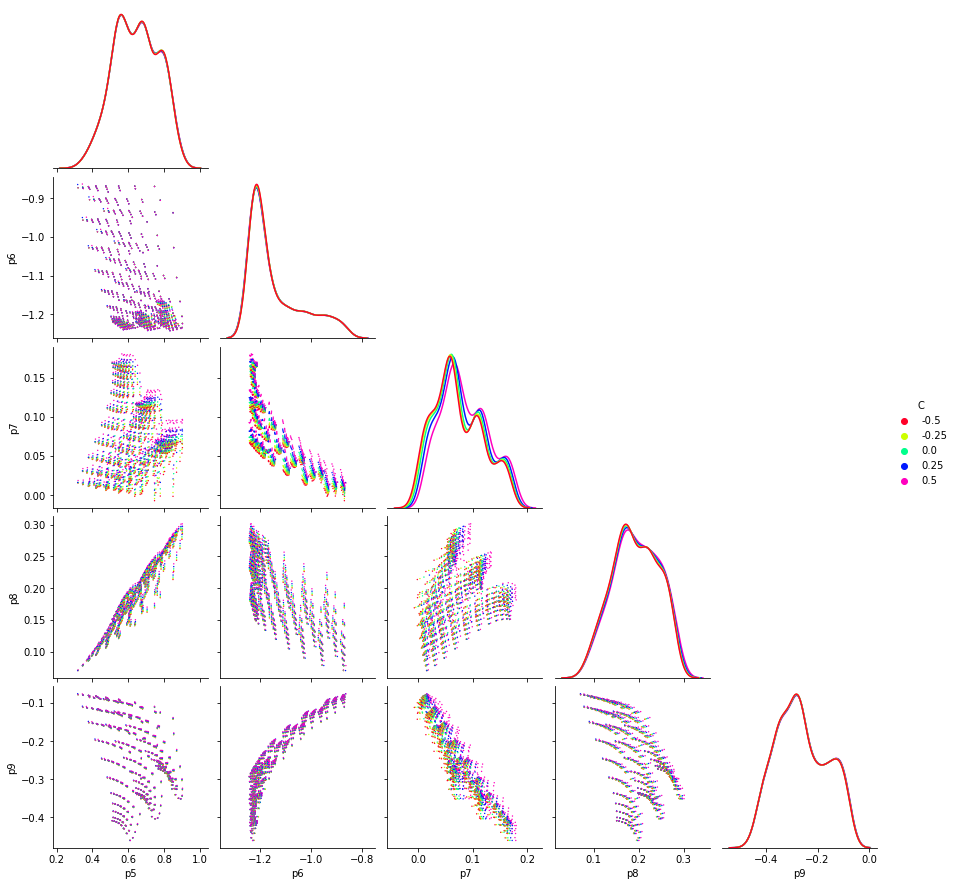

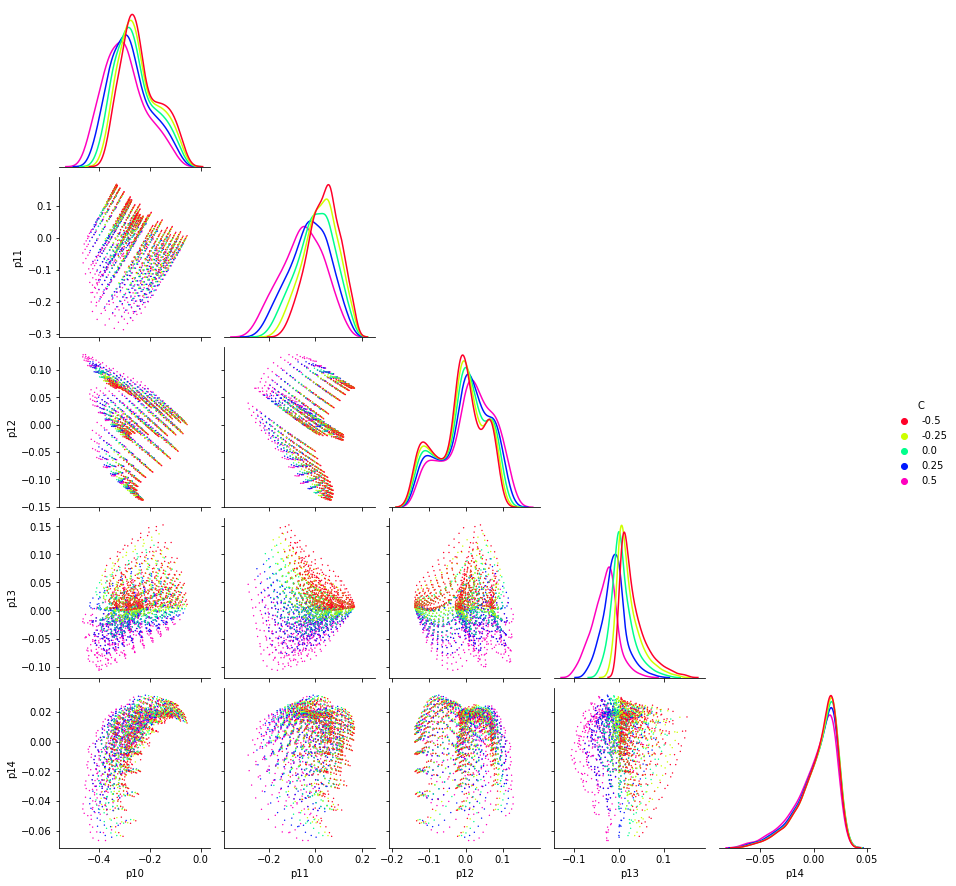

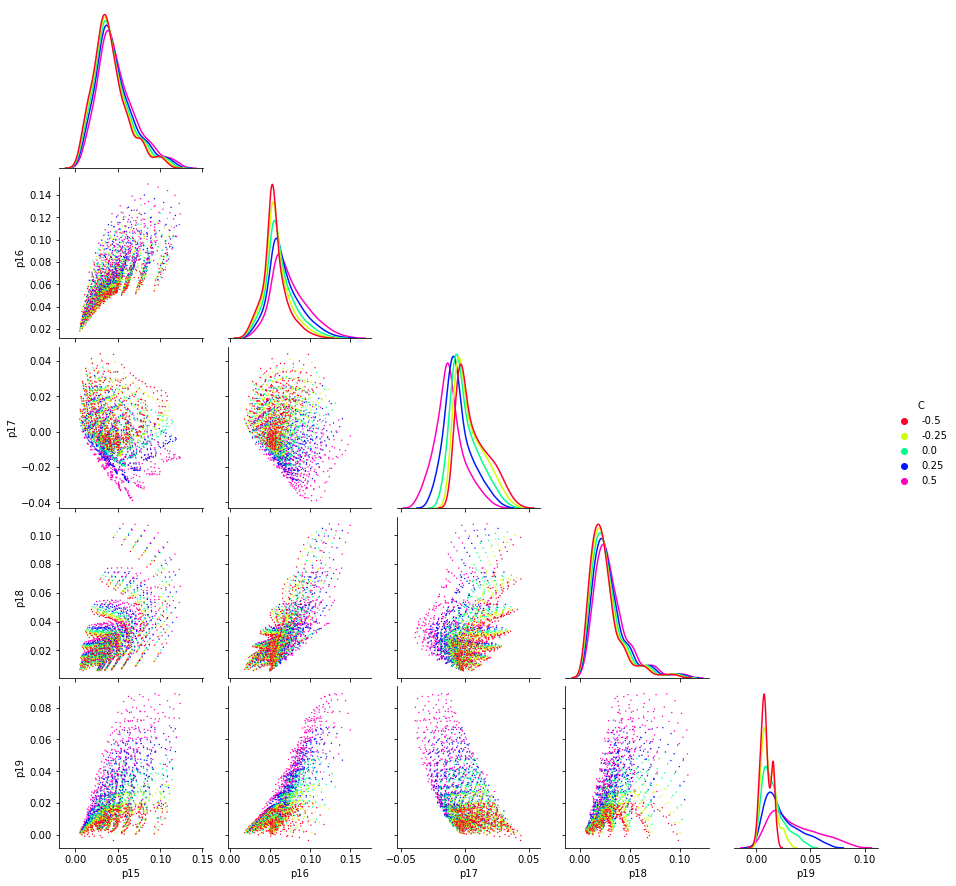

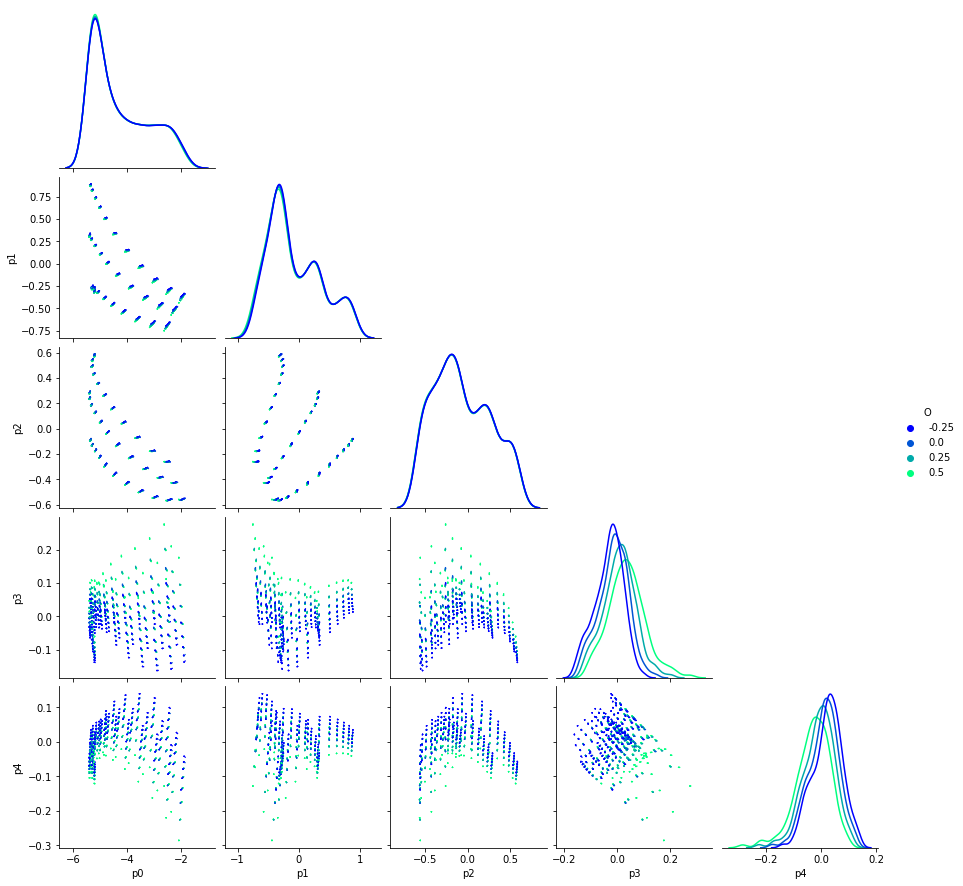

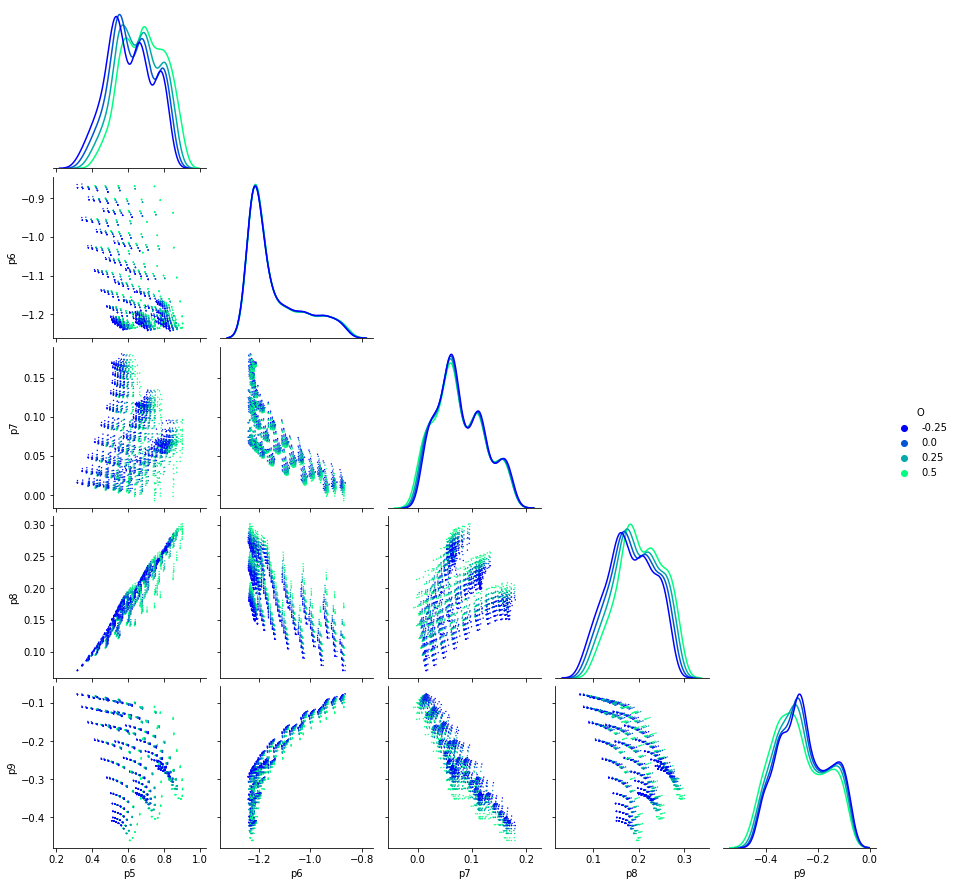

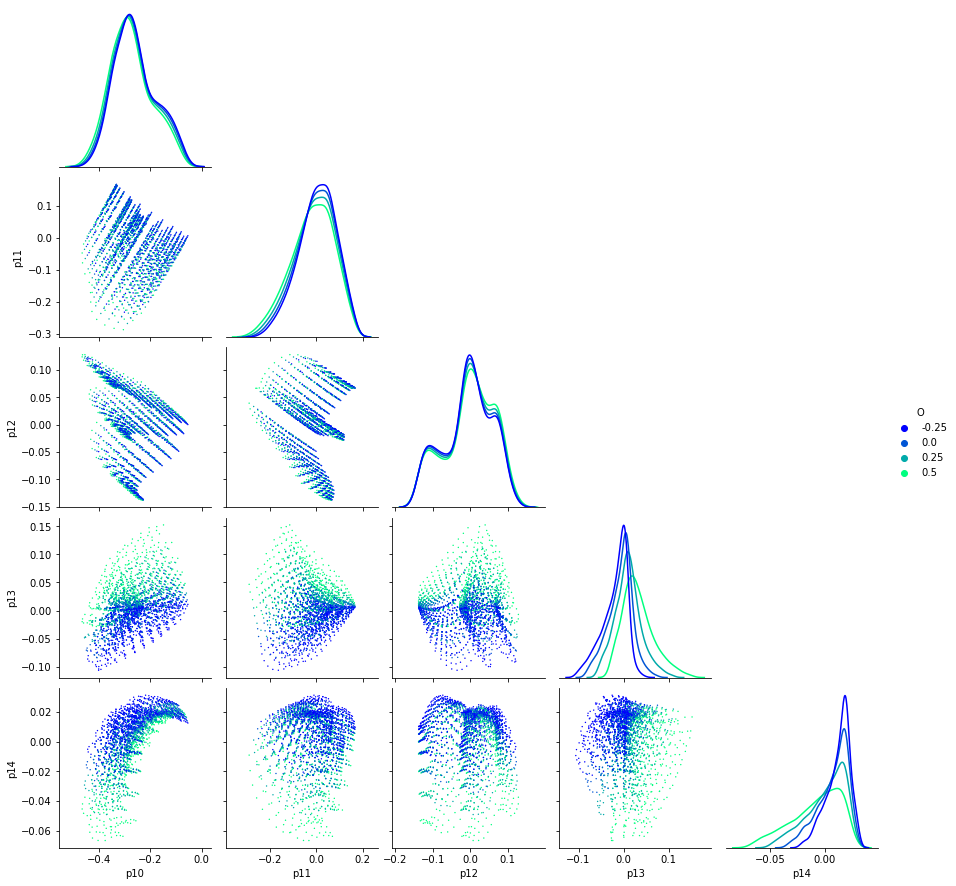

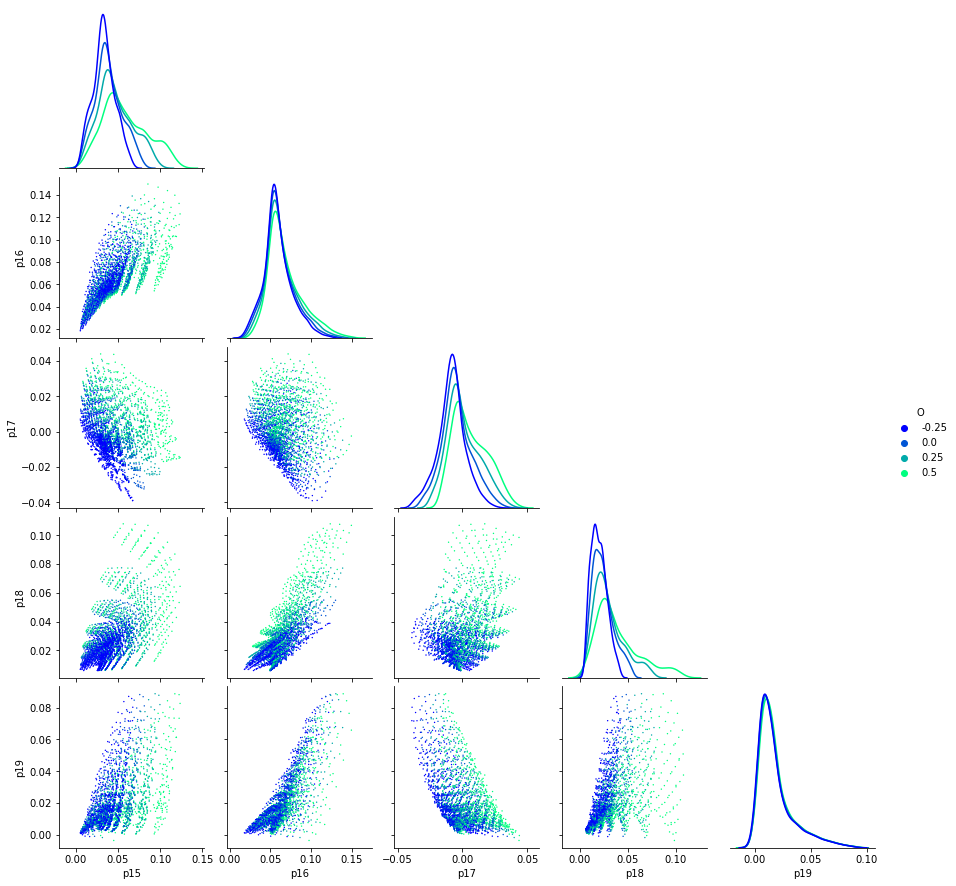

In [112]:
for p in ["F","T","L","C","O"]:
    for i in range(4):
        ds.pp(i, p)

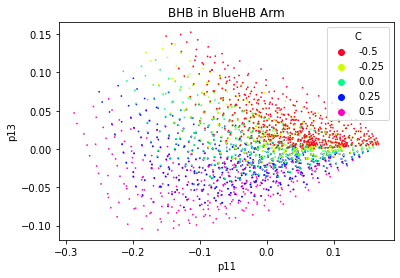

In [124]:
ds.p(11,13,"C")

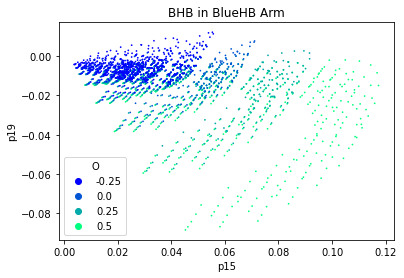

In [125]:
ds.p(15,19,"O")

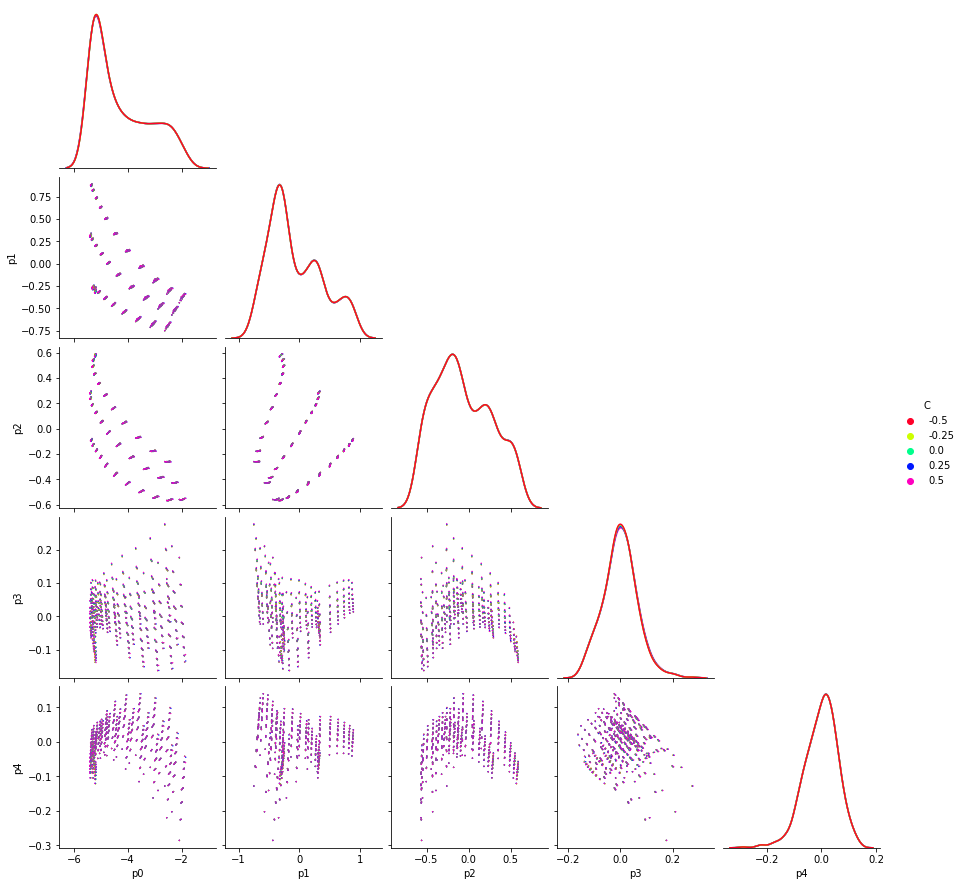

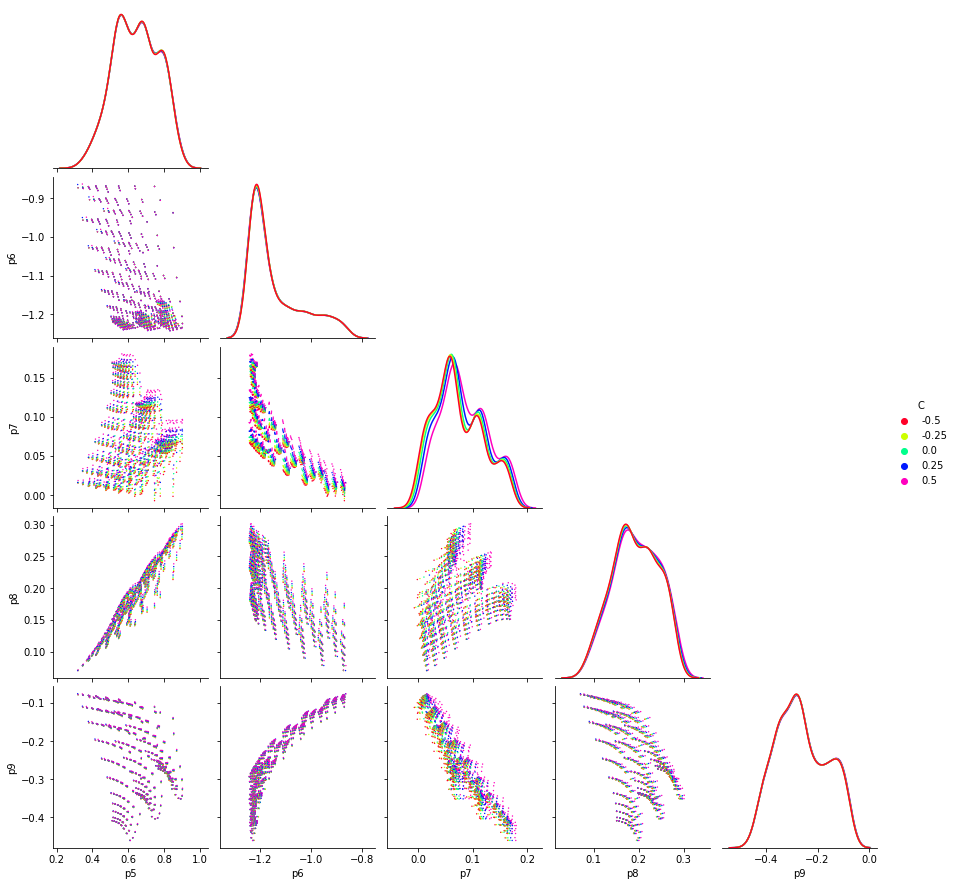

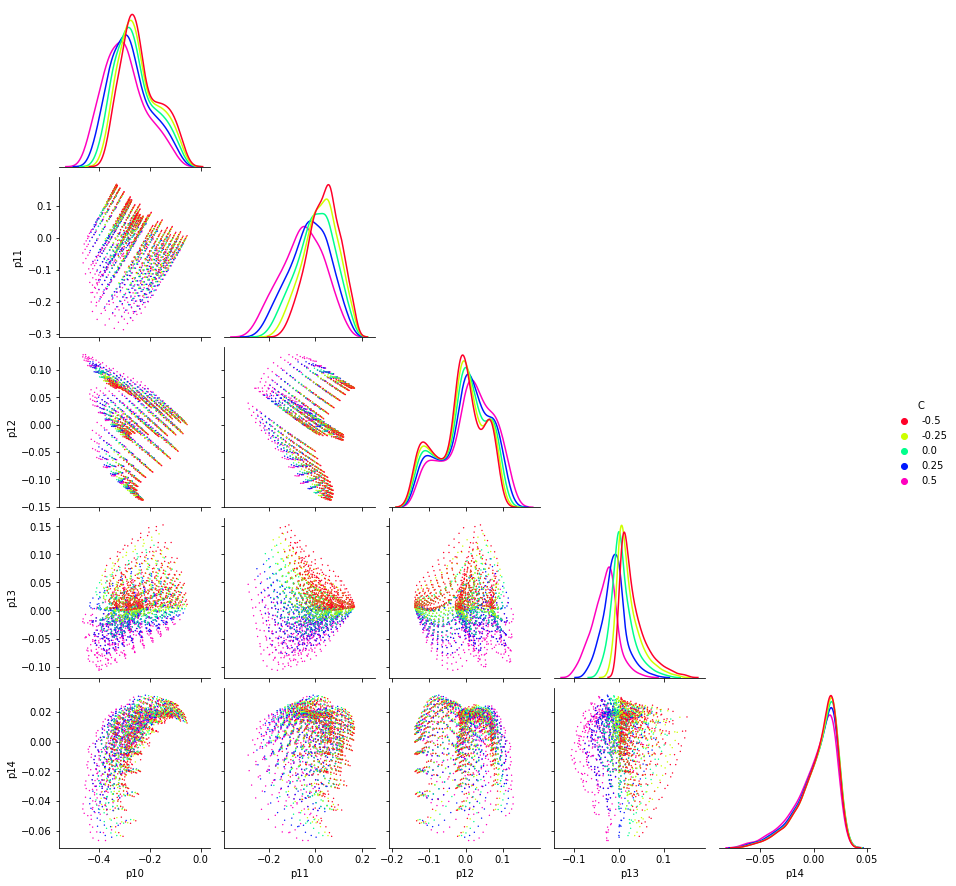

In [118]:
for i in range(3):
    ds.pp(i,"C")

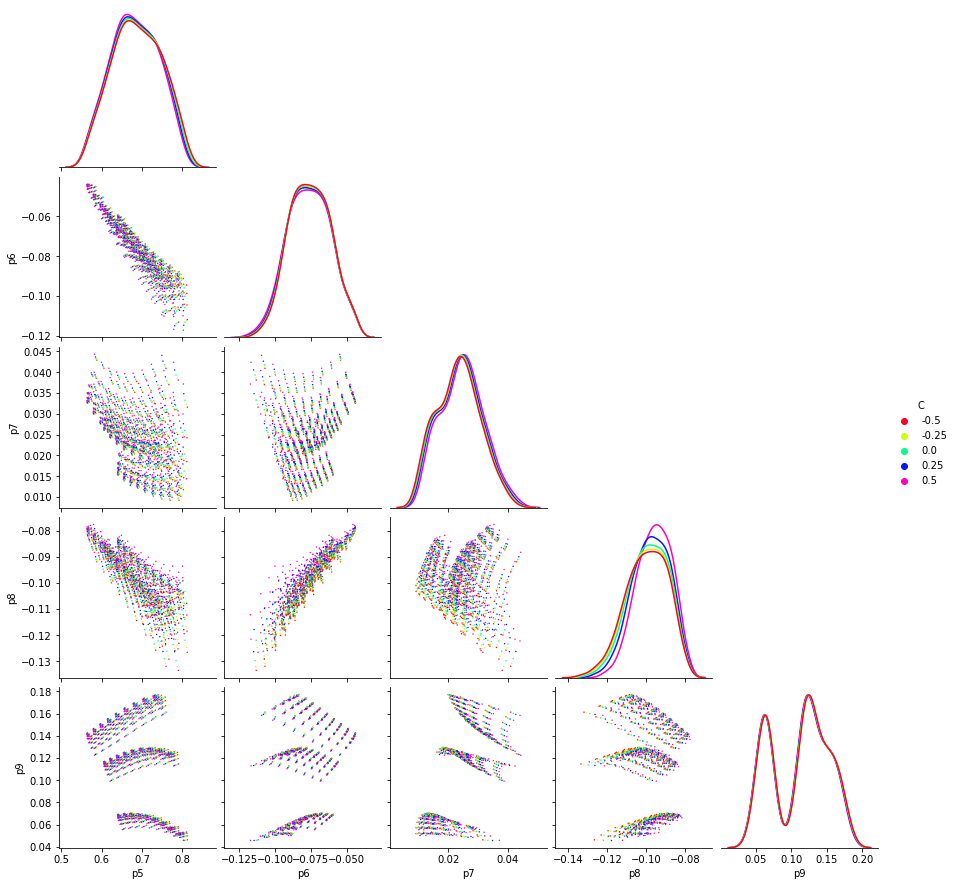

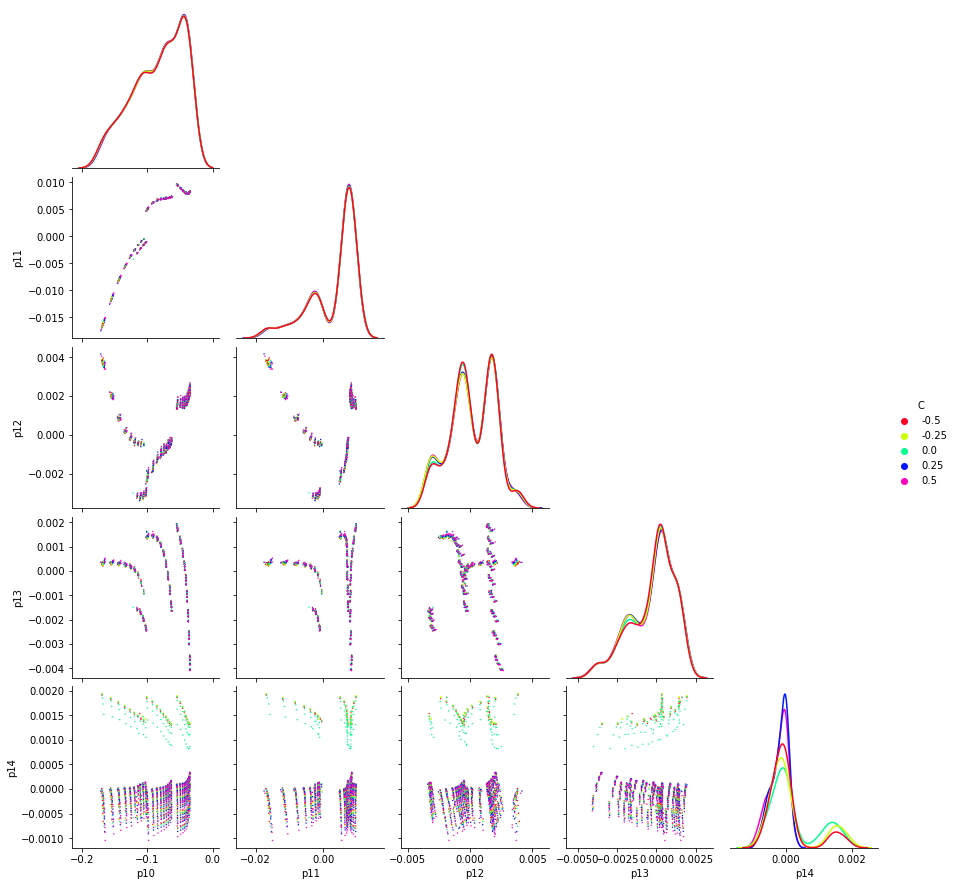

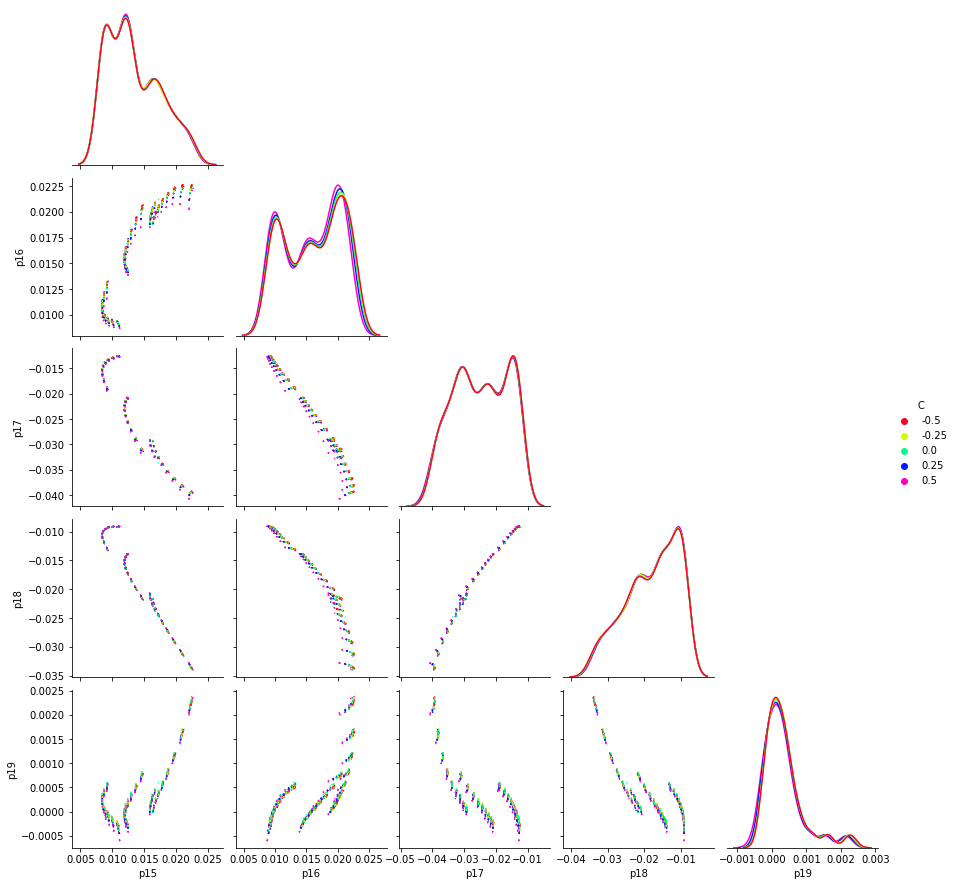

In [29]:
for i in range(1,4):
    ds.pp(i,"C")    

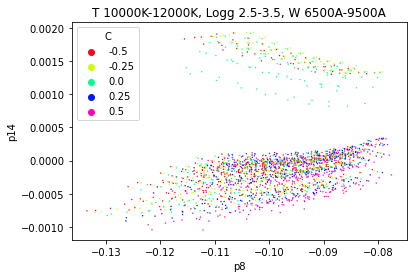

In [30]:
ds.p(8,14,"C")

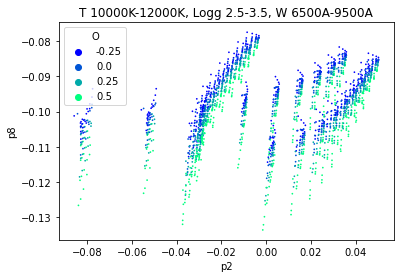

In [44]:
ds.p(2,8,"O")